<center><img src = "https://miro.medium.com/v2/resize:fit:720/format:webp/1*ES7PUAbTX-rqAylU_zkqJA.jpeg"></center>

<center><h1> 💻 Computer Vision | Gender Recognition with InceptionV3 👨👩</h1></center>

<h2>Introduction</h2>

Computer Vision is a field of study focused on enabling computers to identify and understand visual information in the same way humans do. Face recognition is an important subfield of computer vision that deals with the task of identifying and verifying people based on their facial features.<br><br>

The process of face recognition involves capturing an image or video of a face, detecting it in the image, extracting unique features from the face, and then comparing these features to a database of known faces to determine the identity of the person. This is done using advanced algorithms and mathematical models.<br><br>

Face recognition technology is used in a variety of applications, including security systems, photo management software, and social media platforms. It can also be used for passport control at airports or accessing secure buildings.<br><br>

In addition to convenience, face recognition has the potential to improve society in a lot of ways, such as accurately identify missing persons, find suspects in criminal investigations, and track the spread of diseases in public health emergencies.

With this project, I intend to show how Machine Learning can be used for facial recognition tasks, working with the <a href = "https://www.kaggle.com/datasets/jessicali9530/celeba-dataset">CelebFaces Attributes (CelebA) Dataset</a>, which contains a large collection of images of celebrity faces. <br><br>
The purpose of this study is to develop a Deep Learning model with InceptionV3 architecture to accurately identify the gender of a person solely based on their facial features. The use of a pre-trained network, such as InceptionV3, allows for a rapid development process and improved model performance.<br><br>
The results of the project showcased the capability of the model in identifying gender with a high degree of accuracy, further solidifying the potential for this technology to be applied in various real-world applications.

<h2>InceptionV3</h2>

<center><img src = "https://cloud.google.com/static/tpu/docs/images/inceptionv3onc--oview.png?hl=pt-br"></center>

InceptionV3 is a convolutional neural network (CNN) architecture developed by Google in 2015. It was released as part of the TensorFlow library, which makes it freely accessible to the public for use in various deep learning projects.<br><br>

It is designed for image classification tasks and is particularly well-suited for large-scale image recognition problems. It is an improvement over the original Inception architecture, with added layers and more efficient computation.<br><br>

The architecture of InceptionV3 consists of multiple parallel convolutional and pooling layers, called "Inception modules," which are responsible for performing feature extraction from the input image. The Inception modules are followed by fully connected layers that make the final classification decision. The network uses convolutional filters of varying sizes to capture information at different scales, and the Inception modules allow the network to learn multiple patterns simultaneously.<br><br>

It is trained on a large dataset, such as ImageNet, to learn the features and patterns that are relevant for tasks of image classification. The pre-trained weights can then be used as a starting point for fine-tuning on a smaller, specific dataset for a particular task, such as identifying the gender of a person based on their facial features.<br><br>

<h2>The Dataset</h2>

The <a href = "https://www.kaggle.com/datasets/jessicali9530/celeba-dataset">CelebFaces Attributes (CelebA) Dataset</a> is a large-scale collection of celebrity faces gathered by researchers at MMLAB, The Chinese University of Hong Kong. It contains over 200,000 images of 10,000 different celebrities, each annotated with 40 attribute labels such as gender, age, and hair color. This rich and diverse dataset makes it an ideal resource for training deep learning models for a variety of computer vision tasks.<br><br>

In practical applications, deep learning models trained on the CelebA dataset can be used for a range of tasks, including facial attribute classification, face generation, and face recognition. The attributes annotated in this dataset can also be used to train models that are able to accurately detect the gender of a person based on his or her facial features, which is the purpose of the model developed in this notebook.

<h2>Development</h2>

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import cv2    
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import np_utils
import tensorflow as tf

from IPython.core.display import display, HTML
from PIL import Image
from io import BytesIO
import base64
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.express as px

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

C:\Users\hunts\AppData\Local\Temp\ipykernel_26880\3498615445.py:18: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
# Loading a picture in the dataset
picture = './img_align_celeba/000007.jpg'

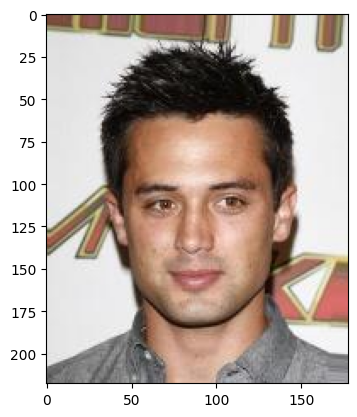

In [3]:
# Displaying one of the picture in the dataset
img = mpimg.imread( picture )
imgplot = plt.imshow( img )
plt.show()

The image displayed above serves as a visual representation of the organized structure of the images within the dataset. Each image has been carefully sorted and grouped, taking into consideration factors such as facial expression, angle, and lighting, among others. This deliberate categorization ensures that the deep learning model being trained on this data is exposed to a diverse range of face images, thereby increasing its accuracy and ability to generalize to new, unseen images.

In [4]:
# Loading dataset containing different attributes for each image 
df = pd.read_csv('./list_attr_celeba.csv')
df

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
202595,202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
202596,202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
202597,202598.jpg,-1,1,1,-1,-1,-1,1,-1,1,...,-1,1,-1,1,1,-1,1,-1,-1,1


As depicted above, the dataset contains 40 binary attribute annotations per image, each of which describes specific features of the person in that image.<br><br> 
These annotations range from whether or not the person has black hair, is wearing earrings, is smiling, is bald, and many others. The binary nature of these annotations means that each feature is marked either with a 1, for a positive response, or with a -1, for a negative response, indicating the presence or absence of that particular feature.

As is common in many machine learning projects here on Kaggle, I will replace the -1 values with 0 to indicate the absence of features in each image. I will also set the Id column as the index and plot a list of column names in the dataframe for better clarity.

In [5]:
df.set_index('image_id', inplace = True) # Setting 'image_id' column as Index
df.replace(to_replace = -1, value = 0,inplace = True ) # Replacing '-1' values for '0', indicating the absence of attributes in the image
df.head(10) # Displaying dataframe after changes

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
image_id,,,,,,,,,,,,,,,,,,,,,
000001.jpg,0,1,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
000002.jpg,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
000003.jpg,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
000004.jpg,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
000005.jpg,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
000006.jpg,0,1,1,0,0,0,1,0,0,0,...,0,0,0,1,1,0,1,0,0,1
000007.jpg,1,0,1,1,0,0,1,1,1,0,...,0,0,1,0,0,0,0,0,0,1
000008.jpg,1,1,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
000009.jpg,0,1,1,0,0,1,1,0,0,0,...,0,1,0,0,1,0,1,0,0,1


In [6]:
# Displaying dataframe columns
df.columns

Index(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes',
       'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair',
       'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin',
       'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones',
       'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair',
       'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick',
       'Wearing_Necklace', 'Wearing_Necktie', 'Young'],
      dtype='object')

The output cell above makes it easier to observe a multitude of features contained within this dataset, such as the presence of a goatee, beard, or wavy hair. One particular column that stands out is 'Male', which may serve as an indicator for training a model that aims to identify the gender of a person based on the images provided as input. To gain a deeper understanding of this column, I will create a new dataframe that only includes the 'Male' column.

In [7]:
# Creating 'gender' dataframe
gender = df[['Male']]
gender.head(10)

,Male
image_id,
000001.jpg,0
000002.jpg,0
000003.jpg,1
000004.jpg,0
000005.jpg,0
000006.jpg,0
000007.jpg,1
000008.jpg,1
000009.jpg,0


It's possible to observe in the dataframe above that the index contains the name of each image file, while the 'Male' column contains binary values of 0 and 1 for each image, where a value of 1 can be interpreted as 'yes,' indicating the presence of a male face in the image, while 0 represents 'no,' indicating the presence of a female face.<br><br> 
To assess the accuracy of the dataset's gender classifications based on the images, we can plot the previously plotted image along with its corresponding label in the dataset. This will provide a visual representation of the relationship between the images and their corresponding gender labels in the 'Male' column.

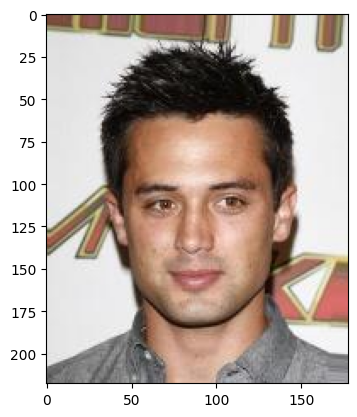

Male    1
Name: 000007.jpg, dtype: int64

In [8]:
# Displaying picture and 'Male' column label
img = mpimg.imread( picture )
imgplot = plt.imshow( img )
plt.show()
gender.loc[picture.split('/')[-1]][['Male']]

It's possible to see that picture above is correctly labeled as 1, indicating the presence of a male face in the image.<br><br>
We can see that image <i>000009.jpg</i> is labeled as 0, which indicates the absence of a male face and presence of a female face. Let's plot the image on the next code cell to see if that label is correct.

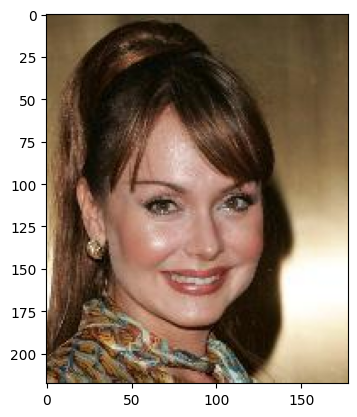

Male    0
Name: 000009.jpg, dtype: int64

In [9]:
# Plotting 000009.jpg image and label 
img = mpimg.imread('./img_align_celeba/000009.jpg')
imgplot = plt.imshow(img)
plt.show()
gender.loc["./img_align_celeba/000009.jpg".split('/')[-1]][['Male']]

It can be observed that the image in question indeed contains a female face, and it is correctly labeled as 0.<br><br> 
Now that we have a clear understanding of the structure of the dataset, we can proceed to plot a pie chart to showcase the distribution of labels within the dataset.

In [10]:
# Plotting gender distribution pie plot
labels = {1:'Male', 0:'Female'} # Assigning 'Male' value for 1 and 'Female' value for 0
value_counts = gender['Male'].value_counts()
values = pd.DataFrame({'Male': value_counts.index, 'count': value_counts.values})
values['Male'] = values['Male'].map(labels)
fig = px.pie(values, values = 'count', names = 'Male', template = 'seaborn',
            title = 'Gender Distribution')
fig.update_traces(hole = .4)
fig.show()

The majority of images within the dataset depict female faces, approximately 58.3%, while the remaining 41.7% depict male faces.<br><br>
In general, a 58.3% / 41.7% distribution is considered moderately imbalanced, and it may not cause major issues in the training process, although it can cause the model to get a bit biased towards the class with more data.

Next, we load the partition dataframe that separates the dataset into training, validation, and testing sets, based on their respective partition labels.

In [11]:
# Loading and displayin partitions dataframe
partitions_df = pd.read_csv('./list_eval_partition.csv')
partitions_df

,image_id,partition
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0
...,...,...
202594,202595.jpg,2
202595,202596.jpg,2
202596,202597.jpg,2
202597,202598.jpg,2


It's important to understand the distribution of the dataset across the three different sets for training, validation, and testing. To do so, I will create a new dataframe that showcases the value counts for each partition label along with its corresponding distribution percentage. This information will give us a better understanding of the proportion of data that is allocated to each set and its significance in the overall model training process.

In [12]:
# Displaying partition distribution
# 0 ==> Training
# 1 ==> Validation
# 2 ==> Testing
partitions_counts = partitions_df['partition'].value_counts()
partitions_percentages = (partitions_df['partition'].value_counts(normalize=True) * 100).round(2)

partitions_values = pd.DataFrame({'count': partitions_counts, 'percentage':partitions_percentages})
partitions_values['percentage'] = partitions_values['percentage'].astype(str) + '%'

partitions_values.index = partitions_values.index.rename('partition')
partitions_values.index = partitions_values.index.map({0: 'Training',
                                                      1: 'Validation',
                                                      2: 'Testing'})
partitions_values

,count,percentage
partition,,
Training,162770,80.34%
Testing,19962,9.85%
Validation,19867,9.81%


The majority of the images, 80.34%, are designated for training the model, while 9.85% and 9.81% of them are allocated for the testing and validation sets, respectively. This distribution allows for a balanced distribution of images for training and evaluating how well the model performs.

In [13]:
# Setting index for 'partitions_df'
partitions_df.set_index('image_id', inplace = True)
partitions_df

,partition
image_id,
000001.jpg,0
000002.jpg,0
000003.jpg,0
000004.jpg,0
000005.jpg,0
...,...
202595.jpg,2
202596.jpg,2
202597.jpg,2


In order to prepare the data for the training and evaluation process, I will merge both the <i>partitions_df</i> and <i>gender</i> dataframes into a single one by their indexes. This new dataframe will provide all necessary information required to train and evaluate the model.

In [14]:
# Merging dataframes
data = gender.merge(partitions_df['partition'], left_index = True, right_index = True)
data

,Male,partition
image_id,,
000001.jpg,0,0
000002.jpg,0,0
000003.jpg,1,0
000004.jpg,0,0
000005.jpg,0,0
...,...,...
202595.jpg,0,2
202596.jpg,1,2
202597.jpg,1,2


In order to optimize the memory usage, we will now proceed to the reduction of the size for each training and evaluation set by specifying smaller partitions. This will enable us to effectively train and evaluate our model while avoiding memory limitations.

In [15]:
main_folder = './' # Defining variable for root folder
images_folder = main_folder + 'img_align_celeba/' # Defining variable for folder that contains images

TRAINING_SAMPLES = 10000 # Defining the amount of samples for the training set
VALIDATION_SAMPLES = 2000 # Defining the amount of samples for the validation set
TEST_SAMPLES = 2000 # Defining the amount of samples for the testing set
IMG_WIDTH = 178 # Setting image width
IMG_HEIGHT = 218 # Setting image height

The next step is to create two functions, one to load and preprocess individual image files, and another to generate the training, validation, and testing sets based on the partition labels. The first function takes the file name as input and loads the image, converts it to an array and normalizes the pixel values by dividing it by 255. The second function uses the partition, attribute and number of samples parameters to separate the data into different sets, returning the processed image data and the corresponding target attributes.

In [16]:
# Loading Images
def load_reshape_img(fname):
    img = load_img(fname) # Loading image 
    x = img_to_array(img)/255. # Converting to array and normalizing
    x = x.reshape((1,) + x.shape) # Reshaping array to have an extra dimension of size 1

    return x


# Generating datasets
def sets_generator(partition, attribute, num_samples):
    
    # Creating 'df_' dataframe, consisting of an equal number of samples for male and female images
    # by selecting half of the samples with a value of 0 and half with a value of 1 from 'data' dataframe
    df_ = data[(data['partition'] == partition) 
                           & (data[attribute] == 0)].sample(int(num_samples/2))
    df_ = pd.concat([df_,
                      data[(data['partition'] == partition) 
                                  & (data[attribute] == 1)].sample(int(num_samples/2))])

    # For the training and validation sets
    if partition != 2:
        
        # Loading images and storing them in the 'x_' array
        x_ = np.array([load_reshape_img(images_folder + fname) for fname in df_.index])
        x_ = x_.reshape(x_.shape[0], 218, 178, 3)
        
        # Storing target variable in the 'y_' array
        y_ = np_utils.to_categorical(df_[attribute],2) # Converting binary attributes to categorical variables
        
    # For the testing set
    else:
        x_ = []
        y_ = []

        for index, target in df_.iterrows():
            
            # Taking images as input and resizing
            im = cv2.imread(images_folder + index)
            im = cv2.resize(cv2.cvtColor(im, cv2.COLOR_BGR2RGB), (IMG_WIDTH, IMG_HEIGHT)).astype(np.float32) / 255.0
            im = np.expand_dims(im, axis =0)
            x_.append(im) # Storing in normalized images
            y_.append(target[attribute]) # Storing in the target variable

    return x_, y_

Data Augmentation is an important step in deep learning computer vision projects, as it helps to avoid overfitting, improves the model's ability to generalize and increases the size of the dataset. This step involves the generation of new data through the transformation of the existing images in the dataset. <br><br>
In the next step of the projet, we use Kera's ImageDataGenerator to perform several data augmentation techniques, such as rotation, shifting, shearing, zooming, and flipping. These transformations allow the model to learn different variations of the same image and help to prevent overfitting by making the model more robust to small variations in the data.

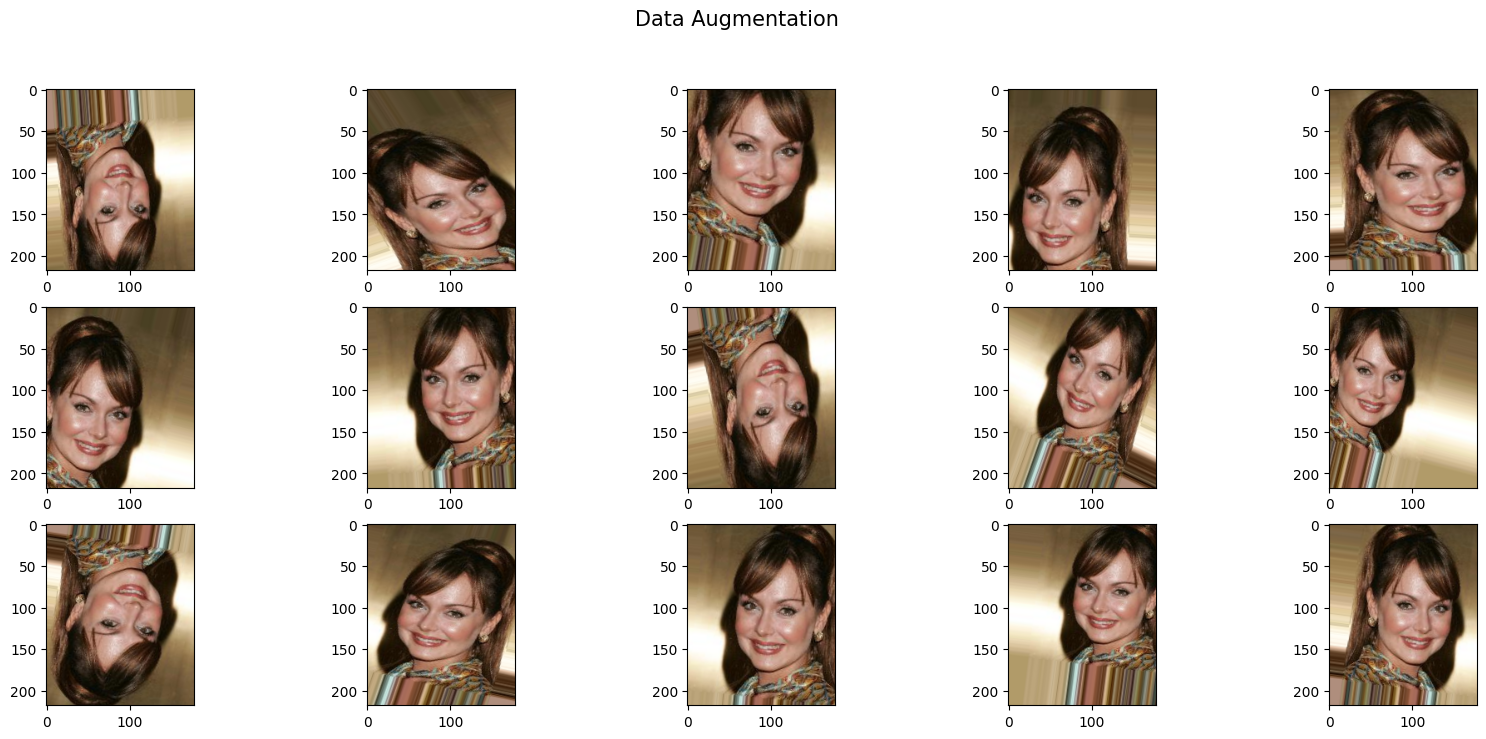

In [17]:
# Demonstrating Data Augmentation
datagen = ImageDataGenerator(
rotation_range = 30,  # Rotating image within an angle between 0 & 30 degrees
width_shift_range = 0.2, # Random horizontal shift
height_shift_range = 0.2, # Random vertical shift
shear_range = 0.2, # Random application of shearing transformations
zoom_range = 0.2, # Random zoom within range
horizontal_flip = True, # Horizontal flip
vertical_flip = True) # Vertical flip

# Loading example image 
img = load_img('./img_align_celeba/000009.jpg')
x = img_to_array(img)/255.
x = x.reshape((1, ) + x.shape)

# Plotting Data Augmentation based on example image
plt.figure(figsize = (20, 8))
plt.suptitle('Data Augmentation', fontsize = 15)

i = 0
for batch in datagen.flow(x, batch_size = 1):
    plt.subplot(3, 5, i + 1)
    plt.grid = (False)
    plt.imshow(batch.reshape(218, 178, 3))
    
    if i == 14:
        break
    i += 1
    
plt.show()

Now we can proceed to divide the data into different sets and apply data augmentation techniques to enhance the variability of the data.

In [18]:
# Splitting data
X_train, y_train = sets_generator(0, 'Male', TRAINING_SAMPLES)

In [19]:
# Applying Data Augmentation on training data
train_datagen = ImageDataGenerator(rotation_range = 30,
width_shift_range = 0.2,
height_shift_range = 0.2,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True,
vertical_flip = True)

train_datagen.fit(X_train)
train_generator = train_datagen.flow(X_train, y_train, batch_size = 16)

In [20]:
# Splitting data
X_val, y_val = sets_generator(1, 'Male', VALIDATION_SAMPLES)

In [21]:
# Applying Data Augmentation on validation data
val_datagen = ImageDataGenerator(rotation_range = 30,
width_shift_range = 0.2,
height_shift_range = 0.2,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True,
vertical_flip = True)

val_datagen.fit(X_val)
val_generator = val_datagen.flow(X_train, y_train, batch_size = 16)

<h2>Modeling</h2>

The next step in this project is to finally build the model. The code below defines a pre-trained InceptionV3 model from the Keras library with imagenet weights and sets the layers as untrainable. Then, we add a few more layers to the model to classify the images based on the target attribute. The added layers include a GlobalAveragePooling2D layer to reduce the size of the tensor, a dense layer with 1024 neurons and ReLU activation, and finally, a dense output layer with 2 neurons and softmax activation. The final model is then defined as the combination of the pre-trained InceptionV3 model and the added layers.

In [22]:
# Loading InceptionV3
base_model = InceptionV3(weights = 'imagenet', include_top = False)

# Freezing layers in the base model to prevent overfitting
for layer in base_model.layers:
    layer.trainable = False
    
# Adding new layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation = 'relu')(x)
predictions = Dense(2, activation = 'softmax')(x)
# Defining final model
model = Model(inputs = base_model.input, outputs = predictions)

By using the plot_model() function, we can visualize the model architecture and make sure that it is as desired. This function provides a graphical representation of the model architecture, which helps us to understand the structure and flow of data through the model and the number of parameters involved.

In [23]:
# Plotting model's architecture
tf.keras.utils.plot_model(model)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [24]:
# Compiling model created above
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [25]:
# ModelCheckpoint is used to save the best model 
checkpointer = ModelCheckpoint(filepath='weights.best.inc.male.hdf5', 
                               verbose=1, save_best_only=True)

In [26]:
# Training model
history = model.fit(X_train, y_train,
         validation_data = (X_val, y_val), epochs = 10, batch_size = 32, callbacks=[checkpointer])

Epoch 1/10
313/313 [==============================] - 78s 244ms/step - loss: 0.3794 - accuracy: 0.8803 - val_loss: 0.5604 - val_accuracy: 0.7690

Epoch 00001: val_loss improved from inf to 0.56043, saving model to weights.best.inc.male.hdf5
Epoch 2/10
313/313 [==============================] - 77s 247ms/step - loss: 0.2269 - accuracy: 0.9109 - val_loss: 0.3178 - val_accuracy: 0.8805

Epoch 00002: val_loss improved from 0.56043 to 0.31779, saving model to weights.best.inc.male.hdf5
Epoch 3/10
313/313 [==============================] - 79s 252ms/step - loss: 0.2032 - accuracy: 0.9200 - val_loss: 0.1626 - val_accuracy: 0.9380

Epoch 00003: val_loss improved from 0.31779 to 0.16257, saving model to weights.best.inc.male.hdf5
Epoch 4/10
313/313 [==============================] - 82s 263ms/step - loss: 0.1831 - accuracy: 0.9269 - val_loss: 0.2256 - val_accuracy: 0.9140

Epoch 00004: val_loss did not improve from 0.16257
Epoch 5/10
313/313 [==============================] - 81s 259ms/step - l

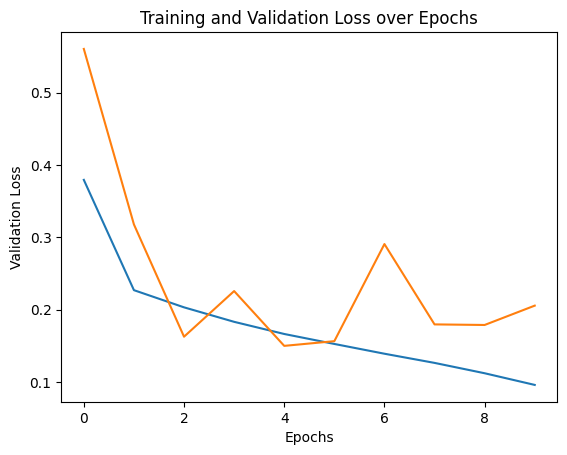

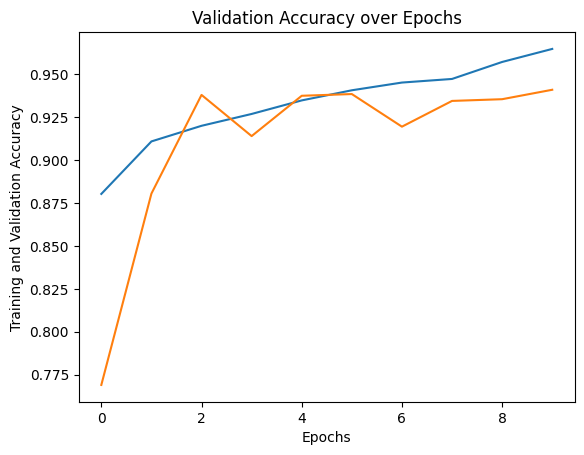

In [27]:
# Plotting loss function and accuracy over epochs
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

plt.plot(range(len(train_loss)), train_loss, label = 'Training Loss')
plt.plot(range(len(val_loss)), val_loss, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.show()

plt.plot(range(len(train_acc)), train_acc, label = 'Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Training and Validation Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.show()

The model was trained for 10 epochs. Each epoch is a complete iteration over the entire training dataset. <br><br>

The loss function, binary crossentropy, and the accuracy metric are both used to evaluate model's performance. The model's training accuracy improves over each epoch, with the accuracy increasing from 0.88 to 0.94. The validation loss decreased from 0.27 to 0.17 over the same period.<br><br>

The model is performing well, achieving an accuracy of 0.93 on the validation set after 10 epochs. The training and validation loss decreased over each epoch, which is a sign that the model learned from the data. The best validation loss of 0.1772 was achieved in the 7th epoch, and the model's weights were saved during that epoch thanks to the ModelCheckpoint function.<br><br>

We can now use this model to make predictions on the testing set.

In [28]:
# Loading best model
model.load_weights('weights.best.inc.male.hdf5')

In [29]:
# Splitting testing data
X_test, y_test = sets_generator(2, 'Male', TEST_SAMPLES)

In [31]:
# Running predictions on testing data
from sklearn.metrics import accuracy_score
y_pred = [np.argmax(model.predict(feature)) for feature in X_test ]
acc = (accuracy_score(y_test, y_pred)) * 100

In [32]:
# Printing accuracy on testing data
print(f"Accuracy: %.2f%%" % acc)

Accuracy: 92.60%


Based on the 93.20%% accuracy score achieved on the testing set, we can conclude that the model is performing well in detecting people's genders based on facial features.<br><br>
This high accuracy score indicates that the model has successfully learned the patterns in the training data and is able to generalize well to new, unseen data.

In [33]:
# Saving model
model.save('gender_recognition.h5')

<h2>Displaying Results</h2>
We can now visualize some images and observe the predictions made by the model to evaluate how it is performing.

In [34]:
# Creating HTML string to display model's results on testing set
gender_target = {0: 'Female'
                , 1: 'Male'}

def img_to_display(filename):
    
    i = Image.open(filename)
    i.thumbnail((200, 200), Image.LANCZOS)
    
    with BytesIO() as buffer:
        i.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()
    

def display_result(filename, prediction, target):
    gender = 'Male'
    gender_icon = "https://cdn-icons-png.flaticon.com/512/3233/3233483.png"
        
    if prediction[1] <= 0.5:
        gender_icon = "https://img.freepik.com/premium-vector/woman-girl-female-cartoon-avatar-icon_25030-13347.jpg?w=2000"
        gender = 'Female'
            
    display_html = '''
    <div style="overflow: auto;  border: 2px solid #D8D8D8;
        padding: 5px; width: 480px;" >
        <img src="data:image/jpeg;base64,{}" style="float: left;" width="200" height="200">
        <div style="padding: 10px 0px 0px 20px; overflow: auto;">
            <img src="{}" style="float: left;" width="40" height="40">
            <h3 style="margin-left: 50px; margin-top: 2px;">Prediction: {}</h3>
            <p style="margin-left: 50px; margin-top: -6px; font-size: 12px">{} probability</p>
            <p style="margin-left: 50px; margin-top: -16px; font-size: 12px">Real gender: {}</p>
        </div>
    </div>
    '''.format(img_to_display(filename)
               , gender_icon
               , gender
               , "{0:.2f}%".format(round(max(prediction)*100,2))
               , gender_target[target]
               , filename.split('/')[-1]
               )

    display(HTML(display_html))

In [35]:
def gender_prediction(filename):
   
    im = cv2.imread(filename)
    im = cv2.resize(cv2.cvtColor(im, cv2.COLOR_BGR2RGB), (178, 218)).astype(np.float32) / 255.0
    im = np.expand_dims(im, axis =0)
    
    # prediction
    result = model.predict(im)
    prediction = np.argmax(result)
    
    return result

C:\Users\hunts\AppData\Local\Temp\ipykernel_26880\3437321795.py:8: DeprecationWarning:

LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.




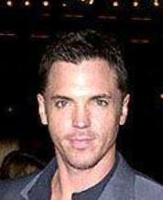


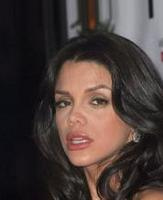


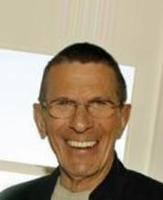


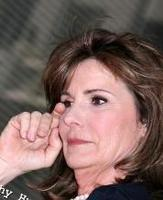


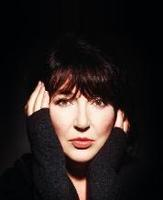


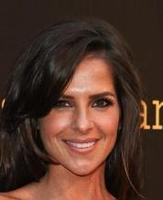


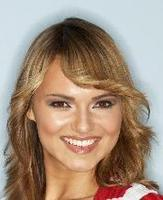


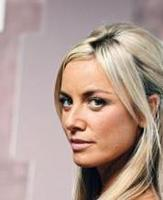


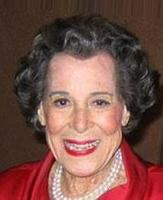


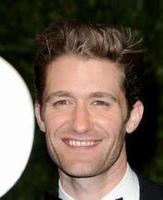

In [36]:
# Selecting random data from Testing set to be displayed
df_to_test = data[(data['partition'] == 2)].sample(10)

for index, target in df_to_test.iterrows():
    result = gender_prediction(images_folder + index)
    
    # Displaying results
    display_result(images_folder + index, result[0], target['Male'])

<h1>Conclusions</h1>
In conclusion, this project demonstrated the application of Machine Learning in the field of computer vision for facial recognition tasks with InceptionV3 architecturet.<br><br> 
The use of a pre-trained network, such as the InceptionV3, improved the model's performance and allowed for a rapid development process. The results showed a high degree of accuracy in identifying gender solely based on facial features, highlighting the potential for this technology to be applied in real-world applications such as security systems and public health emergencies.<br><br>
Thank you so much for reading!<br>
Feel free to leave your upvote and your comments with suggestions.<br><br> 
I'd also like to thank the creator of <a href="https://www.kaggle.com/code/bmarcos/image-recognition-gender-detection-inceptionv3">this notebook</a>, which has been of great help during the development of this project. <br><br> <br><br> 
Thank you!<br><br> 
<i>Luís Fernando Torres</i><br><br> 
<a href = "https://www.linkedin.com/in/luuisotorres/">LinkedIn</a>